---
# Merging exercises

---


## 1. Swedish demographic data (*)

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

&nbsp; c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |


&nbsp; d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 

&nbsp; e) Draw a graph of population data from 1570-2020.

&nbsp; f) Try to see if you can plot something from this data that might show the effects of the Covid-19 pandemic. It's good to zoom in the data, i.e. plot a shorter time frame instead of all time frames. 

&nbsp; g) Try to see if you can plot something from this data that might capture the effects imigration and emigration waves.

&nbsp; h) Feel free to find other interesting facts about the Swedish demographics based on this data. 

<details>
<summary>Hint</summary>

Useful methods:
- append()
- join()
- concat()
- merge()

</details>

<br/>

<details>

<summary>Answer</summary>

![Sweden population data 1952-2020](../assets/sverige_befolkning_tid.png)

</details>

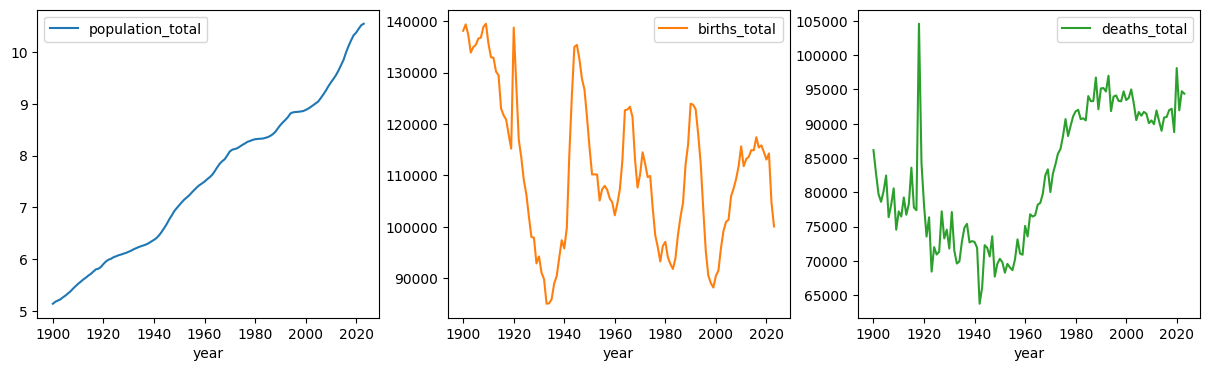

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# read and clean data
df = pd.read_excel('Swe_pop_1900.xls')
df['year'] = pd.to_datetime(df['year']).dt.year

# simple EDA and plotting
df['population_total'] = df['population_total'] / 1000000
df_sorted = df.sort_values('year')
df_sorted.plot(x='year', y=['population_total', 'births_total', 'deaths_total'],
                kind='line', subplots=True, layout=(1, 3), figsize=(15, 4))
plt.show()

# pop before 1900
df_1900 = pd.DataFrame({
    'År': [1570, 1650, 1700, 1720, 1755, 1815, 1865],
    'Folkmängd': [900000, 1225000, 1485000, 1350000, 1878000, 2465000, 4099000]
})
# print(df_1900.to_string(index=False))

# concatenate DF
df = df[['year', 'population_total']].rename(columns={'year': 'År', 'population_total': 'Folkmängd'})
df_concat = pd.concat([df_1900, df])
df_concat = df_concat.iloc[:-3]

# plot a line graph
# df_concat['Folkmängd'] = df_concat['Folkmängd'] / 1000000
# df_concat.plot(x='År', y='Folkmängd', kind='line')
# plt.show()

# covid effect
# df_last_5 = df.tail(5).copy()
# df_last_5['Folkmängd'] = df_last_5['Folkmängd'] / 1000000
# df_last_5.plot(x='År', y='Folkmängd', kind='line')
# plt.show()


---
## 2. Denmark demographic data (*)

Go to the Danish-language wikipedia page [Danmarks demografi](https://da.wikipedia.org/wiki/Danmarks_demografi). 

&nbsp; a) Read in the table under "Demografiske data" into a DataFrame (*)

&nbsp; b) Clean the data and draw a graph of population against year from 1769-2020. (**)


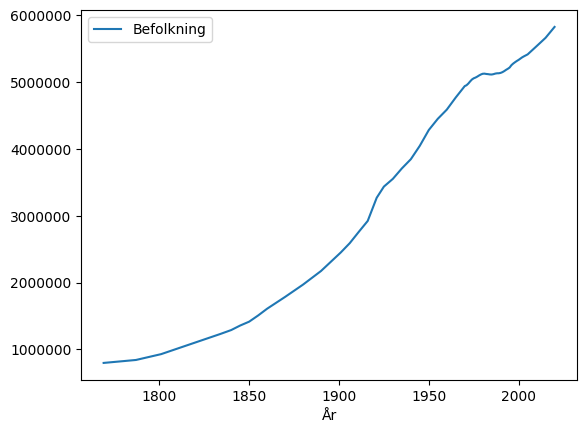

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Danish pop 800-1975
df_DA = {
    'År': [800, 1200, 1769, 1787, 1801, 1834, 1840, 1845, 1850, 1855, 1860, 1870, 1880, 1890,
            1901, 1906, 1911, 1916, 1921, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965,
              1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
                1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 
                 2000, 2001, 2002, 2003, 2005, 2010, 2015, 2020],
    'Befolkning': [500000, 1000000, 797584, 841806, 929001, 1230964, 1289075, 1356877, 1414648, 1507222,
                   1608362, 1784741, 1969039, 2172380, 2449540, 2588919, 2757076, 2921362, 3267831, 3434555,
                   3550656, 3706349, 3844312, 4045232, 4281275, 4448401, 4585256, 4767597, 4937579, 4950598,
                   4975653, 5007538, 5036184, 5054410, 5065313, 5079879, 5096959, 5111537, 5122065, 5123989,
                   5119155, 5116464, 5112130, 5111108, 5116273, 5124794, 5129254, 5129778, 5135409, 5146469,
                   5162126, 5180614, 5196642, 5215718, 5251027, 5275121, 5294860, 5313577, 5330020, 5349212,
                   5368354, 5383507, 5411405, 5534738, 5659715, 5822763]
}

df_DA = pd.DataFrame(df_DA)
#print(df_DA.to_string(index=False))

# filtered from 1979
df_DA_clean = df_DA[df_DA['År'] >= 1769]
df_DA_clean.plot(kind='line', x='År', y='Befolkning')
plt.ticklabel_format(style='plain', axis='y')
plt.show()



---
## 3. Norwegian demographic data (*)

Go to Swedish-language wikipedia page [Norges demografi](https://sv.wikipedia.org/wiki/Norges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) You see some missing data in column "Total fertilitet". Go to the [English page](https://en.wikipedia.org/wiki/Demographics_of_Norway) and read in the data from "Vital statistics since 1900".  

&nbsp; c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet". 


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# read data from both pages
df_NO = pd.read_excel('NO_pop_1900.xls')
df_NO_en = pd.read_excel('NO_pop_1900_en.xls')

# fill and merge
# df_NO['Total fertilitet '].fillna(df_NO_en['Total Fertility Rate'])
# df_NO['Total fertilitet '] = df_NO['Total fertilitet '].combine_first(df_NO_en['Total Fertility Rate'])
# df_NO_end= df_NO.iloc[:, [0, 1, -1]].rename(columns={df_NO.columns[0]: 'År', df_NO.columns[1]: 'Folkmängd', df_NO.columns[-1]:'Fertilitet'})

# df_NO_end

# fill and merge
df_NO.columns = df_NO.columns.str.strip()
df_NO_en.columns = df_NO_en.columns.str.strip()

df_NO['Total fertilitet'] = df_NO['Total fertilitet'].fillna(df_NO_en['Total Fertility Rate'])
df_NO['Total fertilitet'] = df_NO['Total fertilitet'].combine_first(df_NO_en['Total Fertility Rate'])

df_NO_end = df_NO.iloc[:, [0, 1, -1]].rename(columns={
    df_NO.columns[0]: 'År',
    df_NO.columns[1]: 'Folkmängd',
    df_NO.columns[-1]: 'Fertilitet'
})

df_NO_end['Folkmängd'] = pd.to_numeric(
    df_NO_end['Folkmängd'].str.replace(' ', '').str.strip(), 
    errors='coerce'
)
df_NO_end['Fertilitet'] = (
    df_NO_end['Fertilitet']
    .astype(str)
    .str.replace(',', '.', regex=False)  # replace commas with dots
    .astype(float)
)

df_NO_end

# print(df_NO_end['Fertilitet'].iloc[0])
# print(type(df_NO_end['Fertilitet'].iloc[0]))
# print(df_NO_end['Fertilitet'].to_string())

,År,Folkmängd,Fertilitet
0,1900,2231,4.40
1,1901,2255,4.37
2,1902,2276,4.26
3,1903,2288,4.16
4,1904,2298,4.07
...,...,...,...
108,2008,4768,1.96
109,2009,4829,1.98
110,2010,4889,1.95
111,2011,4953,1.88


---
## 4. Merge Sweden-Norway (*)

Create a population graph and a fertility graph showing Sweden and Norway.


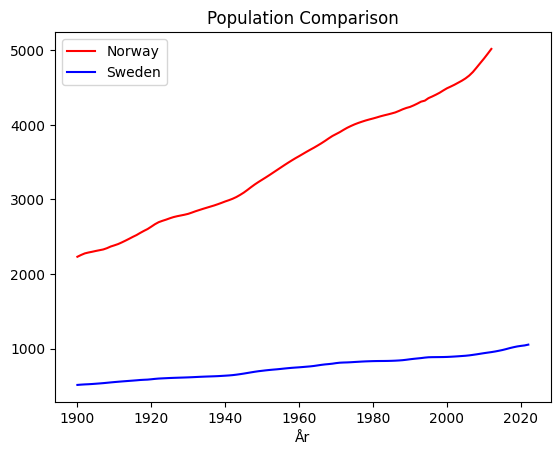

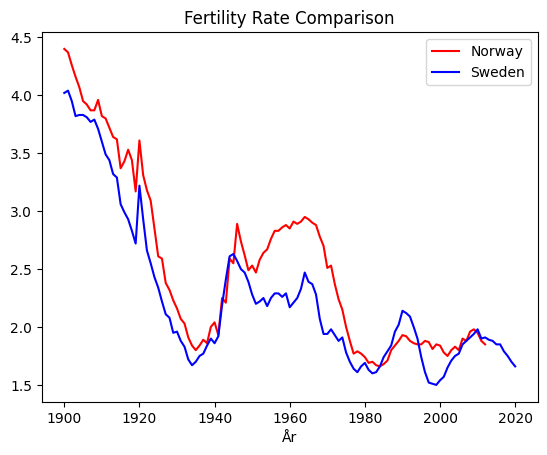

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


# Cleaning the data for Swe
df_Swe = pd.read_excel('Swe_pop_1900.xls')
df_Swe_end = df_Swe.iloc[:, [0, 1, -1]].rename(columns={df_Swe.columns[0]: 'År', df_Swe.columns[1]: 'Folkmängd', df_Swe.columns[-1]:'Fertilitet'})
df_Swe_end['Folkmängd'] = df_Swe_end['Folkmängd'].str.replace(' ', '').str.replace(',', '.').astype(float)
df_Swe_end['Folkmängd'] = df_Swe_end['Folkmängd'] / 10000
df_Swe_end['Fertilitet'] = df_Swe_end['Fertilitet'].str.replace(',', '.').str.strip().astype(float)

ax = df_NO_end.plot(x='År', y='Folkmängd', label='Norway', color='red')
df_Swe_end.plot(x='År', y='Folkmängd', label='Sweden', color='blue', ax=ax, title='Population Comparison')

ax = df_NO_end.plot(x='År', y='Fertilitet', label='Norway', color='red')
df_Swe_end.plot(x='År', y='Fertilitet', label='Sweden', color='blue', ax=ax, title='Fertility Rate Comparison')
plt.show()